This is a toy example of the use of Ball Mapper. We will start by constructing a collection of points sampled from a unit circle.

This notebook was prepared by Davide Gurnari. 

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
#%matplotlib inline

## Generate data

In [2]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=['x', 'y'])
points_df.head()

,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


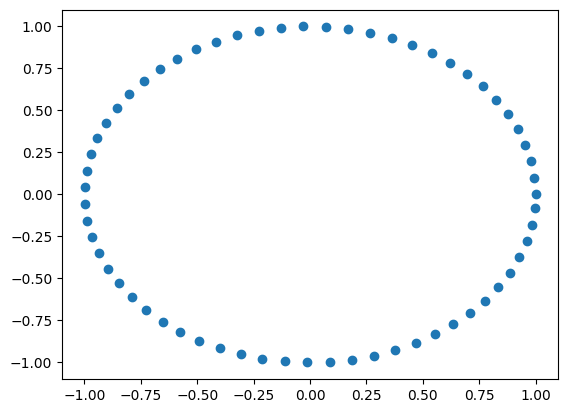

In [3]:
plt.scatter(points_df.x, points_df.y)

## Create BallMapper graph

In [4]:
from pyBallMapper import BallMapper

In [5]:
bm = BallMapper(points = points_df.values, # the pointcloud, as a numpy array
                coloring_df = points_df, # a dataframe with the coloring functions (in this case the pointcloud itself)
                epsilon = 0.25) # the radius of the balls

D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecate

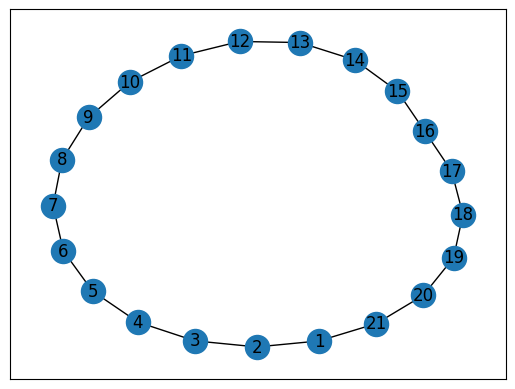

In [6]:
# bm.Graph is a networkx graph
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24))

In [7]:
# each ball stores the indices of the points inside it
print(bm.points_covered_by_landmarks[1])

[0, 1, 2, 61, 62]


## Colored Ball Mapper graph

In [8]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

In [9]:
#Here we adopt standard colour palette
my_red_palette = cm.get_cmap(name='Reds')

In [10]:
# we can color the graph by any column in coloring_df
bm.color_by_variable('y', my_red_palette)

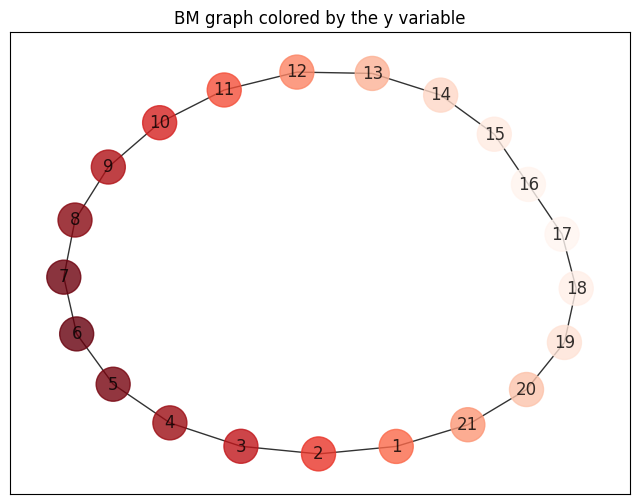

In [12]:
plt.figure(figsize= (8,6))
# plot the graph
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
# there is a lot we can customize
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24),
                 node_color = [bm.Graph.nodes[node]['color'] for node in bm.Graph.nodes],
                 node_size =  [bm.Graph.nodes[node]['size rescaled'] for node in bm.Graph.nodes],
                 alpha=0.8)

# plot a legend
sm = plt.cm.ScalarMappable(cmap = my_red_palette,
                           norm = plt.Normalize(vmin=bm.min_color_value, 
                                                vmax=bm.max_color_value))
#plt.colorbar(sm)
plt.title('BM graph colored by the y variable')
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Fancy visualizations using Bokeh
https://docs.bokeh.org/en/latest/docs/installation.html

In [13]:
from pyBallMapper_Bokeh import graph_GUI

In [14]:
from bokeh.plotting import figure, show
from bokeh.palettes import linear_palette, Reds256, Turbo256

# create a red palette and reverse it (We want 0 to be white and 100 to be red)
my_red_palette = linear_palette(Reds256, 101)[::-1]

In [15]:
# create a GUI with input our BM graph, 
# a dataframe with coloring functions (one value per point in the pointcloud)
# and a color palette
# in this case we use the pointcloud as coloring function
my_fancy_gui = graph_GUI(bm.Graph, points_df, my_red_palette)

D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper_Bokeh.py:42: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in values_df.loc[G.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper_Bokeh.py:42: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in values_df.loc[G.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper_Bokeh.py:42: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in values_df.loc[G.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper_Bokeh.py:42: FutureWarning: iteritems is deprecated and wil

AttributeError: unexpected attribute 'plot_width' to Plot, similar attributes are outer_width, width or min_width

In [16]:
# creates an html file with the graph 
# and opens it in another tab
show(my_fancy_gui.plot)

NameError: name 'my_fancy_gui' is not defined